# Kaggle Journey
Feel free to use, change and track your journey just changing `user_name` variable to yours.  
Upvote is you like it, together with [notebook](https://www.kaggle.com/yassinealouini/yassine-s-journey), [notebook](https://www.kaggle.com/sudalairajkumar/a-look-back-at-your-kaggle-journey), and [notebook](https://www.kaggle.com/shivamb/analyse-your-kaggle-profile-framework) I used to prepare this report.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
print(os.listdir("../input"))
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

['meta-kaggle']
/kaggle/input/meta-kaggle/KernelTags.csv
/kaggle/input/meta-kaggle/KernelVersionCompetitionSources.csv
/kaggle/input/meta-kaggle/Datasets.csv
/kaggle/input/meta-kaggle/KernelVersionKernelSources.csv
/kaggle/input/meta-kaggle/KernelVersionOutputFiles.csv
/kaggle/input/meta-kaggle/KernelVotes.csv
/kaggle/input/meta-kaggle/Submissions.csv
/kaggle/input/meta-kaggle/KernelLanguages.csv
/kaggle/input/meta-kaggle/Users.csv
/kaggle/input/meta-kaggle/ForumMessageVotes.csv
/kaggle/input/meta-kaggle/Competitions.csv
/kaggle/input/meta-kaggle/UserAchievements.csv
/kaggle/input/meta-kaggle/UserOrganizations.csv
/kaggle/input/meta-kaggle/Teams.csv
/kaggle/input/meta-kaggle/UserFollowers.csv
/kaggle/input/meta-kaggle/CompetitionTags.csv
/kaggle/input/meta-kaggle/Kernels.csv
/kaggle/input/meta-kaggle/Organizations.csv
/kaggle/input/meta-kaggle/Datasources.csv
/kaggle/input/meta-kaggle/ForumTopics.csv
/kaggle/input/meta-kaggle/DatasetVersions.csv
/kaggle/input/meta-kaggle/DatasetVotes.c

In [2]:
## Main imports for journey report
import string
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [3]:
## Additional imports for autoreports
import re 
import warnings
import operator
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud, STOPWORDS 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from collections import Counter
import IPython.display
from IPython.core.display import HTML
from PIL import Image 

## Username

In [4]:
user_name = "muhakabartay"

In [5]:
users_df = pd.read_csv("../input/meta-kaggle/Users.csv")
user_df = users_df[users_df["UserName"]==user_name]
user_id = user_df["Id"].values[0]
user_display = user_df["DisplayName"].values[0]
print("The user id for the given user name is : ",user_id)
print("The display name for the given user name is : ",user_display)

The user id for the given user name is :  1788308
The display name for the given user name is :  Mukharbek Organokov


## Competitions

In [6]:
team_members_df = pd.read_csv("../input/meta-kaggle/TeamMemberships.csv")
team_df = pd.read_csv("../input/meta-kaggle/Teams.csv")
comp_df = pd.read_csv("../input/meta-kaggle/Competitions.csv")

temp_df = team_members_df[team_members_df["UserId"]==user_id]
temp_df = pd.merge(temp_df, team_df, left_on="TeamId", right_on="Id", how="left")
temp_df = pd.merge(temp_df, comp_df, left_on="CompetitionId", right_on="Id", how="left")

temp_df["DeadlineDate"] = pd.to_datetime(temp_df["DeadlineDate"], format="%m/%d/%Y %H:%M:%S")
temp_df["DeadlineYear"] = temp_df["DeadlineDate"].dt.year
temp_df["DeadlineDate"] = temp_df["DeadlineDate"].apply(lambda x: datetime.date(x.year,x.month,1))

temp_df = temp_df[~np.isnan(temp_df["PrivateLeaderboardRank"])]
temp_df.head()

,Id_x,TeamId,UserId,RequestDate,Id_y,CompetitionId,TeamLeaderId,TeamName,ScoreFirstSubmittedDate,LastSubmissionDate,PublicLeaderboardSubmissionId,PrivateLeaderboardSubmissionId,IsBenchmark,Medal,MedalAwardDate,PublicLeaderboardRank,PrivateLeaderboardRank,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,CompetitionTypeId,HostName,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,TeamMergerDeadlineDate,TeamModelDeadlineDate,ModelSubmissionDeadlineDate,FinalLeaderboardHasBeenVerified,HasKernels,OnlyAllowKernelSubmissions,HasLeaderboard,LeaderboardPercentage,LeaderboardDisplayFormat,EvaluationAlgorithmAbbreviation,EvaluationAlgorithmName,EvaluationAlgorithmDescription,EvaluationAlgorithmIsMax,ValidationSetName,ValidationSetValue,MaxDailySubmissions,NumScoredSubmissions,MaxTeamSize,BanTeamMergers,EnableTeamModels,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,RewardType,RewardQuantity,NumPrizes,UserRankMultiplier,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions,DeadlineYear
19,3469351,3390067,1788308,07/09/2019,3390067,9992,1788308.0,Mukharbek Organokov,NaN,07/22/2019,11892003.0,11892003.0,False,NaN,NaN,92.0,91.0,9992,recognizing-faces-in-the-wild,Northeastern SMILE Lab - Recognizing Faces in ...,Can you determine if two individuals are related?,Playground,203897.0,2301.0,1,NaN,05/14/2019 14:44:24,2019-08-01,08/01/2019 23:59:00,08/01/2019 23:59:00,NaN,NaN,True,True,False,True,50,0.0,AUC,Area Under Receiver Operating Characteristic C...,Measures discrimination. Calculates how well a...,True,NaN,NaN,5,2,5.0,False,False,False,False,Knowledge,NaN,0,0.0,False,522,573,6911,2019
23,3468949,3389669,1788308,07/09/2019,3389669,12716,413189.0,3rd8M,NaN,10/11/2019,12786318.0,12786318.0,False,3.0,10/12/2019,92.0,92.0,12716,youtube8m-2019,The 3rd YouTube-8M Video Understanding Challenge,Temporal localization of topics within video,Research,260272.0,1623.0,1,NaN,06/27/2019 15:53:07,2019-10-01,10/04/2019 23:59:00,10/04/2019 23:59:00,10/25/2019 00:00:00,NaN,True,True,False,True,20,0.0,YT8M_MeanAveragePrecisionAtK,YT8M_MAP@{K},YT8M Custom MAP@{K} to handle partial ground t...,True,NaN,NaN,5,2,5.0,False,True,False,False,USD,25000.0,10,1.0,True,282,340,3747,2019
29,3761026,3674201,1788308,09/18/2019,3674201,13451,1956324.0,MAMIC,NaN,11/09/2019,13210286.0,13210286.0,False,NaN,NaN,132.0,241.0,13451,rsna-intracranial-hemorrhage-detection,RSNA Intracranial Hemorrhage Detection,Identify acute intracranial hemorrhage and its...,Featured,362170.0,1817.0,1,NaN,09/18/2019 02:15:25,2019-11-01,10/28/2019 23:59:00,10/28/2019 23:59:00,11/04/2019 23:59:00,NaN,True,True,False,True,1,0.0,WeightedMeanColumnwiseLogLoss,Weighted Mean Columnwise Log Loss,Mean columnwise log loss with sample weights.,False,NaN,NaN,5,2,5.0,False,True,False,False,USD,25000.0,13,1.0,True,432,723,2553,2019
30,3515853,3435774,1788308,07/19/2019,3435774,13578,1788308.0,Mukharbek Organokov,NaN,09/08/2019,12428010.0,12428010.0,False,NaN,NaN,165.0,176.0,13578,kuzushiji-recognition,Kuzushiji Recognition,Opening the door to a thousand years of Japane...,Playground,280294.0,2681.0,1,NaN,07/18/2019 23:21:31,2019-10-01,10/07/2019 23:59:00,10/07/2019 23:59:00,10/26/2019 00:00:00,NaN,True,True,False,True,13,0.0,KNISTMicroF1,KNISTMicroF1,KNISTMicroF1,True,NaN,NaN,5,2,5.0,False,True,False,False,USD,15000.0,0,0.0,False,293,338,2652,2019
32,3542194,3461516,1788308,07/26/2019,3461516,14241,1788308.0,NorthernSteel,NaN,10/23/2019,12852501.0,12852501.0,False,NaN,NaN,644.0,1000.0,14241,severstal-steel-defect-detection,Severstal: Steel Defect Detection,Can you detect and classify defects in steel?,Featured,288048.0,2888.0,1,NaN,07/25/2019 21:10:14,2019-10-01,10/17/2019 23:59:00,10/17/2019 23:59:00,12/07/2019 00:00:00,NaN,True,True,True,True,32,0.0,Dice,NaN,Mean Dice Coefficient,True,NaN,NaN,5,2,5.0,False,True,False,False,USD,120000.0,5,1.0,True,2427,2867,51874,2019


### Competition types

In [7]:
cnt_srs = temp_df["HostSegmentTitle"].value_counts()

labels = (np.array(cnt_srs.index))
sizes = (np.array((cnt_srs / cnt_srs.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Competition Type Distribution',
    font=dict(size=14),
    width=700,
    height=700,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="usertype")

### Data types in competitions

In [8]:
comp_tags_df = pd.read_csv("../input/meta-kaggle/CompetitionTags.csv")
tags_df = pd.read_csv("../input/meta-kaggle/Tags.csv")
cnt_df = pd.merge(temp_df[["CompetitionId"]], comp_tags_df, on="CompetitionId", how="inner")
cnt_df = pd.merge(cnt_df, tags_df, left_on="TagId", right_on="Id", how="inner")
cnt_df["Name"].value_counts()

def bar_chart(cnt_srs, color):
    trace = go.Bar(
        x=cnt_srs.index,
        y=cnt_srs.values,
        showlegend=False,
        marker=dict(
            color=color,
        ),
    )
    return trace

cnt_srs = cnt_df["Name"].value_counts().head(10)
traces = [bar_chart(cnt_srs, "orange")]
layout = go.Layout(
    title='Data type of competitions',
    font=dict(size=14),
    barmode='stack',
    width=1000,
    height=600,
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

**Seems I like Computer Vision competitions as well as tabular data.**

### My teams

In [9]:
cnt_srs = temp_df["TeamName"].value_counts().head(5)
traces = [bar_chart(cnt_srs, "green")]
layout = go.Layout(
    title='Favorite Team Name',
    font=dict(size=14),
    barmode='stack',
    width=1000,
    height=600,
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

**Seems my team names mostly is used once, and surely I use my name when I Kaggle alone.**

In [10]:
temp_df = team_members_df[team_members_df["UserId"]==user_id]
temp_df = pd.merge(team_members_df, temp_df, on="TeamId", how="inner", suffixes=('', '_y'))
temp_df = temp_df[temp_df["UserId"]!=user_id]
temp_df = pd.merge(temp_df, users_df, left_on="UserId", right_on="Id", how="left")

cnt_srs = temp_df["DisplayName"].value_counts().head(7)
traces = [bar_chart(cnt_srs, "red")]
layout = go.Layout(
    title='Number of competitions with favorite team members ',
    font=dict(size=14),
    barmode='stack',
    width=1000,
    height=600,
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

**My brilliant teammates**
* [Ashish Gupta](https://www.kaggle.com/roydatascience) 42
* [Manoj Prabhakar](https://www.kaggle.com/manojprabhaakr) 13
* [Carlo Lepelaars](https://www.kaggle.com/carlolepelaars) 13 
* [Yassine Alouini](https://www.kaggle.com/yassinealouini) 8
* [Firat Gonen](https://www.kaggle.com/frtgnn) 7
* [Stanislav Blinov](https://www.kaggle.com/stanislavblinov) 5 
* [Rohit Agarwal](https://www.kaggle.com/rohitagarwal) 4
* [Vladimir Sydorskyy](https://www.kaggle.com/vladimirsydor) 2 (not plotted but worth mentioning -we did 2 great silvers together)

Please,  check [Yassine Alouini](https://www.kaggle.com/yassinealouini)'s journey in this amazing [notebook](https://www.kaggle.com/yassinealouini/yassine-s-journey) on which this one is based on. Original [notebook](https://www.kaggle.com/sudalairajkumar/a-look-back-at-your-kaggle-journey). Upvote are welcome.

### Ranks

In [11]:
## We redefine here
team_members_df = pd.read_csv("../input/meta-kaggle/TeamMemberships.csv")
team_df = pd.read_csv("../input/meta-kaggle/Teams.csv")
comp_df = pd.read_csv("../input/meta-kaggle/Competitions.csv")

temp_df = team_members_df[team_members_df["UserId"]==user_id]
temp_df = pd.merge(temp_df, team_df, left_on="TeamId", right_on="Id", how="left")
temp_df = pd.merge(temp_df, comp_df, left_on="CompetitionId", right_on="Id", how="left")

temp_df["DeadlineDate"] = pd.to_datetime(temp_df["DeadlineDate"], format="%m/%d/%Y %H:%M:%S")
temp_df["DeadlineYear"] = temp_df["DeadlineDate"].dt.year
temp_df["DeadlineDate"] = temp_df["DeadlineDate"].apply(lambda x: datetime.date(x.year,x.month,1))

temp_df = temp_df[~np.isnan(temp_df["PrivateLeaderboardRank"])]

In [12]:
def scatter_plot(cnt_srs, color):
    trace = go.Scatter(
        x=cnt_srs.index[::-1],
        y=cnt_srs.values[::-1],
        showlegend=False,
        marker=dict(
            color=color,
        ),
    )
    return trace

cnt_df = temp_df.groupby('DeadlineYear')['PrivateLeaderboardRank'].agg(["size", "mean", "min"])
cnt_srs = cnt_df["size"]
cnt_srs = cnt_srs.sort_index()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(color="green",),
)

layout = go.Layout(
    title='Count of competitions over years',
    font=dict(size=14),
    width=700,
    height=600,
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="TargetCount")

In [13]:
## Mean Private Rank 
cnt_srs = cnt_df["mean"]
cnt_srs = cnt_srs.sort_index()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(color="blue",),
)

layout = go.Layout(
    title='Mean Rank over years',
    font=dict(size=14),
    width=700,
    height=600,
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="TargetCount")

In [14]:
## Best rank each year 
cnt_srs = cnt_df["min"]
cnt_srs = cnt_srs.sort_index()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(color="red",),
)

layout = go.Layout(
    title='Best Rank in each year',
    font=dict(size=14),
    width=700,
    height=600,
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="TargetCount")

### Medals

In [15]:
temp_df["Medal"].value_counts()

3.0    6
2.0    5
Name: Medal, dtype: int64

In [16]:
print("{} Silver medals".format(temp_df["Medal"].value_counts().iloc[1]))
print("{} Bronze medals".format(temp_df["Medal"].value_counts().iloc[0]))

5 Silver medals
6 Bronze medals


In [17]:
cnt_df = temp_df.pivot_table(index="DeadlineYear", columns="Medal", values="PrivateLeaderboardRank", aggfunc="count")
cnt_df = cnt_df.fillna(0)

def get_bar_chart(cnt_srs, name, color):
    trace = go.Bar(
        x=cnt_srs.index,
        y=cnt_srs.values,
        name=name,
        marker=dict(color=color,),
    )
    return trace

medal_map = {1.:"Gold", 2.:"Silver", 3.:"Bronze"}
color_map = {1.:"gold", 2.:"silver", 3.:"darkorange"}
traces = []
for col in np.array(cnt_df.columns)[::-1]:
    cnt_srs = cnt_df[col]
    traces.append(get_bar_chart(cnt_srs, medal_map[col], color_map[col]))

layout = go.Layout(
    title='Competition Medals in each year',
    font=dict(size=14),
    barmode='stack',
    width=700,
    height=600,
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

**Seems I become better, more silvers in 2020 after 1 year of experience in competitions**

## Kernels/Notebooks

In [18]:
kernels_df = pd.read_csv("../input/meta-kaggle/Kernels.csv")
temp_df = kernels_df[kernels_df["AuthorUserId"]==user_id]
temp_df["MadePublicDate"] = pd.to_datetime(temp_df["MadePublicDate"], format="%m/%d/%Y")
temp_df["MadePublicYear"] = temp_df["MadePublicDate"].dt.year
temp_df.head()

,Id,AuthorUserId,CurrentKernelVersionId,ForkParentKernelVersionId,ForumTopicId,FirstKernelVersionId,CreationDate,EvaluationDate,MadePublicDate,IsProjectLanguageTemplate,CurrentUrlSlug,Medal,MedalAwardDate,TotalViews,TotalComments,TotalVotes,MadePublicYear
253023,4908933,1788308,37655726.0,17492069.0,107002.0,17512310.0,07/20/2019 12:00:34,06/28/2020,2019-07-27,False,can-boost-to-0-798-with-starter-kernel-for-0-79,2.0,09/02/2019,2475,11,39,2019
254734,5007542,1788308,17853281.0,17841071.0,NaN,17853193.0,07/27/2019 00:10:22,07/27/2019,2021-01-17,False,ieee-fraud-detection-lgbm-stacking-overfit,NaN,NaN,21,0,2,2021
264577,5621252,1788308,37661139.0,NaN,106939.0,19917099.0,09/01/2019 00:03:20,06/28/2020,2019-09-01,False,0-8518-what-proper-weights-give-ieee-int-blend,2.0,09/29/2019,4359,9,37,2019
264654,5627068,1788308,38835883.0,19807024.0,NaN,19940780.0,09/01/2019 11:49:40,07/15/2020,2019-09-01,False,bump-to-0-800-e-2ln-more-efficient,3.0,09/06/2019,1225,0,20,2019
268399,5854330,1788308,37661182.0,NaN,115330.0,20751347.0,09/18/2019 07:36:18,06/28/2020,2019-09-18,False,ieee-push-0-9530-all-weighted,3.0,10/04/2019,1064,2,12,2019


In [19]:
## Number of kernels
cnt_srs = temp_df["MadePublicYear"].value_counts()
traces = [bar_chart(cnt_srs, "blue")]
layout = go.Layout(
    title='Number of kernels in each year',
    font=dict(size=14),
    width=500,
    height=500,
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

**Seems number of notebooks I create is growing, almost x2. Will try to double it in 2021 too.**

In [20]:
## Number of views
cnt_srs = temp_df.groupby("MadePublicYear")["TotalViews"].mean()
traces = [bar_chart(cnt_srs, "green")]
layout = go.Layout(
    title='Mean number of views per kernel',
    font=dict(size=14),
    width=500,
    height=500,
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

**Seems I should promote my notebooks better. Almost x4 times decrease in views per notebook (x2 in total while I made x2 more notebooks in 2020).**

In [21]:
## Number of votes
cnt_srs = temp_df.groupby("MadePublicYear")["TotalVotes"].mean()
traces = [bar_chart(cnt_srs, "red")]
layout = go.Layout(
    title='Mean number of votes per kernel',
    font=dict(size=14),
    width=500,
    height=500,
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

**Seems I should promote my notebooks better. Almost 50% decrease in upvote rate per notebook.**

### Medals

In [22]:
cnt_df = temp_df.pivot_table(index="MadePublicYear", columns="Medal", values="AuthorUserId", aggfunc="count")
cnt_df = cnt_df.fillna(0)

def get_bar_chart(cnt_srs, name, color):
    trace = go.Bar(
        x=cnt_srs.index,
        y=cnt_srs.values,
        name=name,
        marker=dict(
            color=color,
        ),
    )
    return trace

medal_map = {1.:"Gold", 2.:"Silver", 3.:"Bronze"}
color_map = {1.:"gold", 2.:"silver", 3.:"darkorange"}
traces = []
for col in np.array(cnt_df.columns)[::-1]:
    cnt_srs = cnt_df[col]
    traces.append(get_bar_chart(cnt_srs, medal_map[col], color_map[col]))

layout = go.Layout(
    title='Kernel Medals in each year',
    font=dict(size=14),
    barmode='stack',
    width=700,
    height=600,
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

**Seems I become better in 2020, more bronze medals, new gold medal. Willing to get more gold medals in 2021.**

### Tags

In [23]:
temp_df = kernels_df[kernels_df["AuthorUserId"]==user_id]
kernel_tags_df = pd.read_csv("../input/meta-kaggle/KernelTags.csv")
temp_df = pd.merge(temp_df, kernel_tags_df, left_on="Id", right_on="KernelId", how="inner")
temp_df = pd.merge(temp_df, tags_df, left_on="TagId", right_on="Id", how="inner")

cnt_srs = temp_df["Name"].value_counts().head(15)
traces = [bar_chart(cnt_srs, "orange")]
layout = go.Layout(
    title='Tag count of the kernels',
    font=dict(size=14),
    barmode='stack',
    width=1300,
    height=600,
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

**My notebooks are mostly EDA with few DL oriented. Plan for 2021 to have more ML/DL models oriented notebooks.**

## Discussions

In [24]:
#temp_df = kernels_df[kernels_df["AuthorUserId"]==user_id]
forum_message_df = pd.read_csv("../input/meta-kaggle/ForumMessages.csv")
temp_df = forum_message_df[forum_message_df["PostUserId"]==user_id]
temp_df["PostDate"] = pd.to_datetime(temp_df["PostDate"], format="%m/%d/%Y %H:%M:%S")
temp_df["PostYear"] = temp_df["PostDate"].dt.year
temp_df.head()

,Id,ForumTopicId,PostUserId,PostDate,ReplyToForumMessageId,Message,Medal,MedalAwardDate,PostYear
230447,309002,53551,1788308,2018-04-04 13:31:53,307387.0,<p>Good suggestion!</p>,3.0,04/15/2018,2018
243100,580698,61522,1788308,2019-07-20 15:36:09,NaN,<p>Very good! MNIST LB plot is very nice to se...,3.0,07/21/2019,2019
250226,340349,58194,1788308,2018-06-09 00:59:16,NaN,<p>Wow! </p>,NaN,NaN,2018
257329,340342,58401,1788308,2018-06-09 00:50:02,339720.0,"<p><a href=""http://gpu.userbenchmark.com/Compa...",NaN,NaN,2018
257330,340343,58401,1788308,2018-06-09 00:50:28,339720.0,<p>How comfortable you are with GTX 1080Ti? </p>,NaN,NaN,2018


In [25]:
# Number of kernels
cnt_srs = temp_df["PostYear"].value_counts()
traces = [bar_chart(cnt_srs, "blue")]
layout = go.Layout(
    title='Number of forum posts in each year',
    font=dict(size=14),
    width=700,
    height=600,
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

In [26]:
cnt_df = temp_df.pivot_table(index="PostYear", columns="Medal", values="PostUserId", aggfunc="count")
cnt_df = cnt_df.fillna(0)

def get_bar_chart(cnt_srs, name, color):
    trace = go.Bar(
        x=cnt_srs.index,
        y=cnt_srs.values,
        name=name,
        marker=dict(
            color=color,
        ),
    )
    return trace

medal_map = {1.:"Gold", 2.:"Silver", 3.:"Bronze"}
color_map = {1.:"gold", 2.:"silver", 3.:"darkorange"}
traces = []
for col in np.array(cnt_df.columns)[::-1]:
    cnt_srs = cnt_df[col]
    traces.append(get_bar_chart(cnt_srs, medal_map[col], color_map[col]))

layout = go.Layout(
    title='Discussion Medals in each year',
    font=dict(size=14),
    barmode='stack',
    width=700,
    height=600,
)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig, filename='stacked-bar')

**I was very active in 2019 and took some break in 2020. Seems I should come back in 2021.**

## Nice 

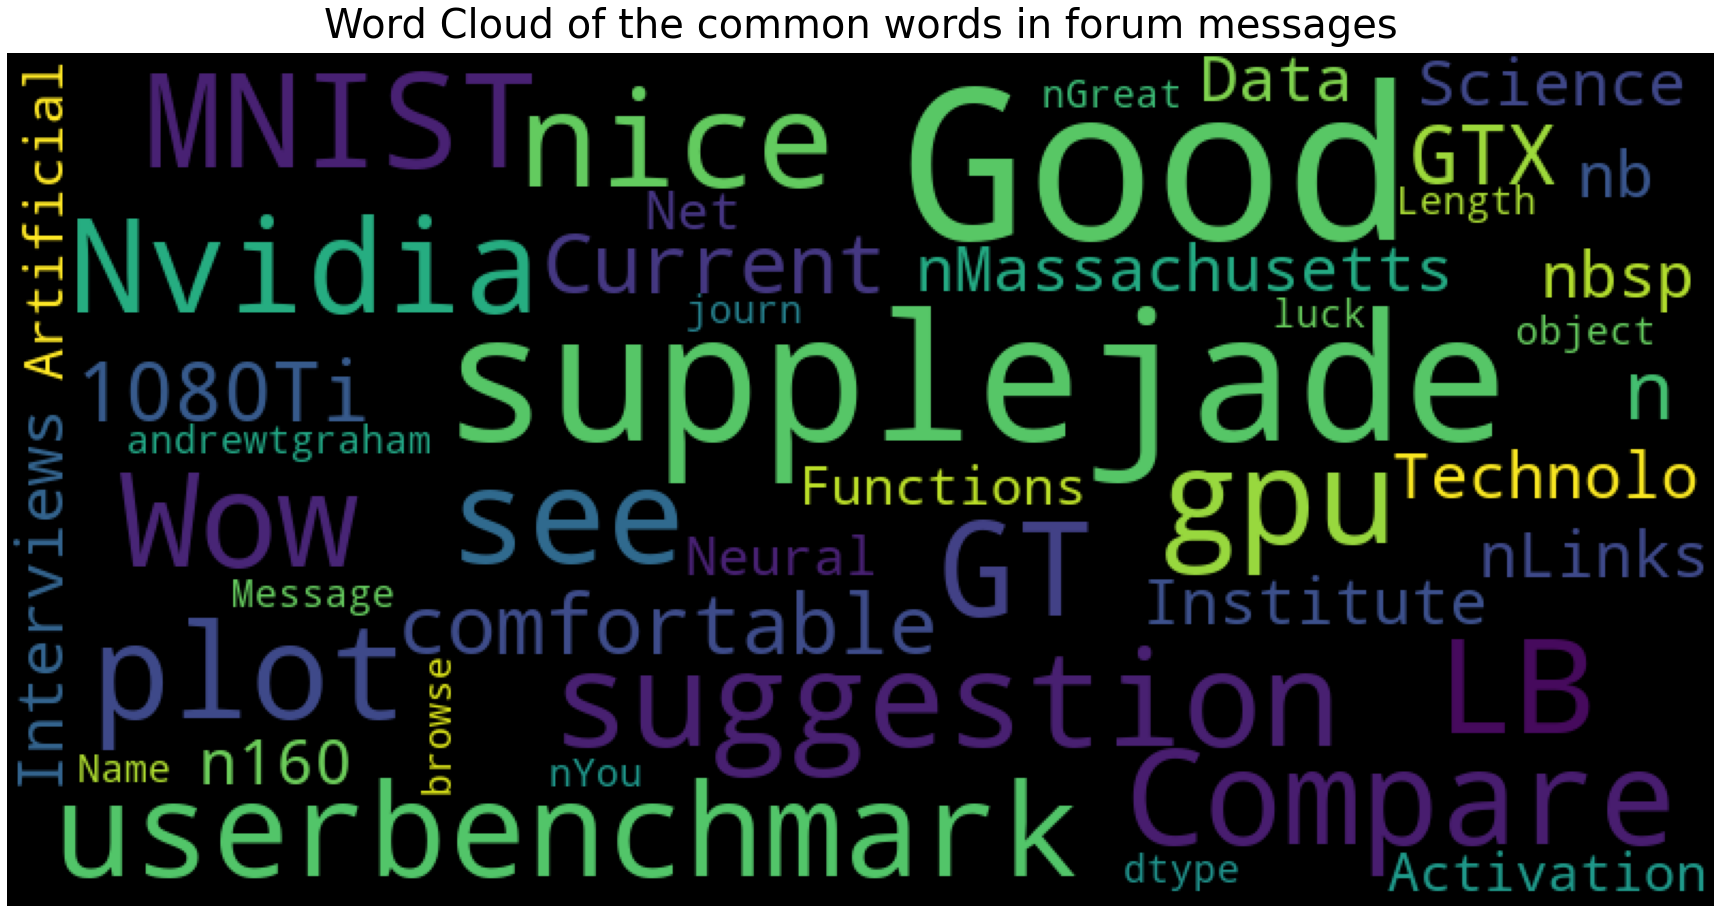

In [27]:
import re
def clean_string(txt):
    txt = str(txt)
    txt = re.sub("<.*?>", "", txt)
    txt = re.sub(' +', ' ', txt)
    return txt

temp_df["Message"] = temp_df["Message"].apply(lambda x: clean_string(x))
#temp_df.head()

from wordcloud import WordCloud, STOPWORDS

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=300, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(temp_df["Message"], title="Word Cloud of the common words in forum messages")

## AutoReport 

In [28]:
## Environment Preparation
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)
stopwords = stopwords.words("english")
punc = string.punctuation 
lem = WordNetLemmatizer()

## Load dataset
user_followers = pd.read_csv("../input/meta-kaggle/UserFollowers.csv")
kernels_tag_df = pd.read_csv("../input/meta-kaggle/KernelTags.csv")
messages = pd.read_csv("../input/meta-kaggle/ForumMessages.csv")
forums_df = pd.read_csv("../input/meta-kaggle/Forums.csv")
kernels_df = pd.read_csv("../input/meta-kaggle/Kernels.csv")
tags_df = pd.read_csv("../input/meta-kaggle/Tags.csv")
users = pd.read_csv("../input/meta-kaggle/Users.csv")

In [29]:
## function to clean the text
def clean_text(txt):    
    txt = txt.lower()
    txt = re.sub('<[^<]+?>', '', txt)
    txt = "".join(x for x in txt if x not in punc)
    words = txt.split()
    words = [wrd for wrd in words if wrd not in stopwords]
    words = [wrd for wrd in words if not wrd.startswith("http")]
    txt = " ".join(words)
    return txt

## function to generate ngrams
def ngrams(txt, n):
    txt = txt.split()
    output = []
    for i in range(len(txt)-n+1):
        output.append(" ".join(txt[i:i+n]))
    return output

## function to create bins 
def wordmap(val):
    if val < 10:
        return "0-10"
    elif val < 20:
        return "10-25"
    elif val < 50:
        return "25-50"
    elif val < 100:
        return "50-100"
    else:
        return "100+"

## main Analysis Function
def _analyze_profile(username):
    account_id = users[users["UserName"] == username]["Id"].iloc(0)[0]
    name = users[users["UserName"] == username]["DisplayName"].iloc(0)[0]

    mydf = messages[messages["PostUserId"] == account_id]
    mydf['PostDate'] = pd.to_datetime(mydf["PostDate"])
    mydf["weekday"] = mydf["PostDate"].dt.weekday
    mydf["monthday"] = mydf["PostDate"].dt.day
    mydf["hour"] = mydf["PostDate"].dt.hour
    mydf["clean_message"] = mydf["Message"].fillna("").apply(lambda x : clean_text(x))
    mydf["word_len"] = mydf["clean_message"].apply(lambda x : len(x.split()))
    mydf["char_len"] = mydf["clean_message"].apply(lambda x : len(x.replace(" ","")))

    text = " ".join(mydf["clean_message"].dropna())
    unigrams = Counter(ngrams(text, 1))
    bigrams = Counter(ngrams(text, 2))
    unigrams_d = dict(unigrams)
    bigrams_d = dict(bigrams)

    mydf["word_len_bin"] = mydf["word_len"].apply(wordmap)
    mydf["char_len_bin"] = mydf["char_len"].apply(wordmap)

    mydf['Date'] = mydf['PostDate'].dt.date
    mydf['month'] = mydf['PostDate'].dt.month
    dateComments = mydf['Date'].value_counts().to_frame().reset_index().sort_values("index")

    mytags = []
    forumIDs = list(mydf['ForumTopicId'].values)
    for forum_id in forumIDs:
        try:
            kernel_id = kernels_df[kernels_df["ForumTopicId"] == forum_id]['Id'].iloc(0)[0]
            taglist = list(kernels_tag_df[kernels_tag_df["KernelId"] == kernel_id]["TagId"].values)
            mytags.extend(tags_df[tags_df["Id"].isin(taglist)]['Name'].values)
        except Exception as E:
            pass
    
    metrics = {"mytags" : mytags, "unigrams" : unigrams, "unigrams_d" : unigrams_d,
               "bigrams" : bigrams, "bigrams_d" : bigrams_d, "dateComments" : dateComments, 
               "name" : name, "account_id" : account_id}
    return mydf, metrics

## Main Visualization Function
def _prepare(mydf, metrics):
    mytags = metrics["mytags"]
    unigrams = metrics["unigrams"]
    bigrams = metrics["bigrams"]
    bigrams_d = metrics["bigrams_d"]
    unigrams_d = metrics["unigrams_d"]
    dateComments = metrics["dateComments"] 
    account_id = metrics["account_id"]
    name = metrics["name"]

    mpp = {0 : "Mon", 1: "Tue", 2: "Wed", 3:"Thu", 4:"Fri", 5:"Sat", 6:"Sun"}
    mydf["word_density"] = mydf["char_len"] / (1+mydf["word_len"])
    mydf["word_density"] = mydf["word_density"].apply(lambda x : round(x,2))

    daymp = {}
    lst = mydf["weekday"].value_counts().to_frame().reset_index()
    for l,day in lst.iterrows():
        daymp[day["index"]] = day["weekday"]
    sorted_x = sorted(daymp.items(), key=operator.itemgetter(1), reverse = True)
    
    # insights_t = {
    #     "Total Discussions" : len(mydf),
    #     "Average Discussions Per Day" : int(np.mean(np.array(dateComments["Date"].values))),
    #     "Average Discussions Per Month" : int(np.mean(mydf["month"].value_counts().values)),
    #     "Maximum Discussions on Single Day" : int(np.max(np.array(dateComments["Date"].values))),
    #     "Maximum Discussions Date" : str(dateComments[dateComments["Date"] == np.max(np.array(dateComments["Date"].values))]["index"].iloc(0)[0]),
    #     "Most Discussions WeekDay" : mpp[sorted_x[0][0]],
    #     "Least Discussions WeekDay" : mpp[sorted_x[-1][0]],
    #     "Average Words Per Discussions" : int(np.mean(mydf["word_len"])),
    #     "Average Characters Per Discussions" : int(np.mean(mydf["char_len"])),
    #     "Average Word Density Per Discussions" : round(np.mean(mydf["word_density"]),2),
    #     "Top KeyWord Used" : unigrams.most_common()[0][0],
    #     "Top Tag Followed" : Counter(mytags).most_common(1)[0][0],
    #     "Total Discussions" : len(mydf),
    #    "Average Discussions Per Day" : int(np.mean(np.array(dateComments["Date"].values))),
    #    "Average Discussions Per Month" : int(np.mean(mydf["month"].value_counts().values)),
    #     "Maximum Discussions on Single Day" : int(np.max(np.array(dateComments["Date"].values))),
    #     "Maximum Discussions Date" : str(dateComments[dateComments["Date"] == np.max(np.array(dateComments["Date"].values))]["index"].iloc(0)[0]),
    #    "Most Discussions WeekDay" : mpp[sorted_x[0][0]],
    #    "Least Discussions WeekDay" : mpp[sorted_x[-1][0]],
    #    "Average Words Per Discussions" : int(np.mean(mydf["word_len"])),
    #    "Average Characters Per Discussions" : int(np.mean(mydf["char_len"])),
    #    "Average Word Density Per Discussions" : round(np.mean(mydf["word_density"]),2),
    #    "Top KeyWord Used" : unigrams.most_common()[0][0],
    #    "Top Tag Followed" : Counter(mytags).most_common(1)[0][0],
    #}
    
    insights = {
        "Total Discussions" : len(mydf),
        "Average Discussions Per Day" : int(np.mean(np.array(dateComments["Date"].values))),
        "Average Discussions Per Month" : int(np.mean(mydf["month"].value_counts().values)),
        "Maximum Discussions on Single Day" : int(np.max(np.array(dateComments["Date"].values))),
        "Maximum Discussions Date" : str(dateComments[dateComments["Date"] == np.max(np.array(dateComments["Date"].values))]["index"].iloc(0)[0]),
        "Most Discussions WeekDay" : mpp[sorted_x[0][0]],
        "Least Discussions WeekDay" : mpp[sorted_x[-1][0]],
        "Average Words Per Discussions" : int(np.mean(mydf["word_len"])),
        "Average Characters Per Discussions" : int(np.mean(mydf["char_len"])),
        "Average Word Density Per Discussions" : round(np.mean(mydf["word_density"]),2),
        "Top KeyWord Used" : unigrams.most_common()[0][0],
        "Top Tag Followed" : Counter(mytags).most_common(1)[0][0],
    }

    tabs1 = list(insights.keys())
    tabvals1 = list(insights.values())
    tr9 = go.Table(header=dict(values=['Metric', 'Value'], line = dict(color='#7D7F80'), fill = dict(color='#a1c3d1'), align = ['left'] * 2),
                     cells=dict(values=[tabs1, tabvals1], line = dict(color='#7D7F80'), fill = dict(color='#EDFAFF'), align = ['left'] * 2))

    layout = dict(title="Report Summary : " + name, height=500)
    data = [tr9]
    fig = dict(data=data, layout=layout)
    iplot(fig)

    lst = unigrams.most_common(15)
    tr1 = go.Bar(y= [c[0] for c in lst][::-1], x= [c[1] for c in lst][::-1], orientation="h") 
    lst = bigrams.most_common(15)
    tr2 = go.Bar(y= [c[0] for c in lst][::-1], x= [c[1] for c in lst][::-1], orientation="h") 

    dvals = [daymp[0], daymp[1], daymp[2], daymp[3], daymp[4], daymp[5], daymp[6]]
    tr3 = go.Bar(x= ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"], y= dvals, marker=dict(color="#c7a6ea")) 
    lst = mydf["monthday"].value_counts()
    tr4 = go.Bar(x= lst.index, y= lst.values, marker=dict(color="#c7a6ea")) 

    lst = dict(mydf["word_len_bin"].value_counts())
   # xx = ["0-10", "10-25", "25-50", "50-100", "100+"]
    xx = ["0-10", "10-25", "25-50", "50-100"]
    yy = [lst[v] for v in xx]
    tr5 = go.Bar(x= xx, y= yy, marker=dict(color="#eaa5b8")) 
    lst = mydf["char_len_bin"].value_counts()
    yy = [lst[v] for v in xx]
    tr6 = go.Bar(x= xx, y= yy, marker=dict(color="#eaa5b8")) 

    lst = Counter(mytags).most_common(15)
    tr7 = go.Scatter(x=[c+3 for c in range(len(lst))], y = [c[1] for c in lst], text=[c[0] for c in lst], 
                     textposition='top right', textfont=dict(size=10), mode='markers+text', marker=dict(color="#42f4a4", size=25 ))

    fig = tools.make_subplots(rows=5, cols=2, vertical_spacing = 0.05, print_grid=False, specs = [[{"colspan" : 2},None], [{},{}], [{},{}], [{"colspan" : 2},None], [{"colspan" : 2},None]], 
                             subplot_titles=["Discussions by Date", "Day of the Week - Discussion Activity", "Day of the Month - Discussion Activity",
                                             "Number of Words per Discussions", "Number of Characters used per Discussions", 
                                             "Top Kernel Tags Followed", "Followers Gained Since 2017" ])

    tr8 = go.Scatter(x = dateComments["index"], y = dateComments["Date"], mode="lines+markers", line=dict(color="orange", width=3))
    myfol = user_followers[user_followers["FollowingUserId"] == account_id]
    myfol["Date"] = pd.to_datetime(myfol["CreationDate"])
    tmp = myfol["Date"].value_counts().to_frame().reset_index().sort_values("index")
    tr10 = go.Scatter(x = tmp["index"], y = tmp["Date"], mode="lines+markers", line=dict(color="pink", width=3))

    fig.append_trace(tr8, 1, 1)
    fig.append_trace(tr3, 2, 1)
    fig.append_trace(tr4, 2, 2)
    fig.append_trace(tr5, 3, 1)
    fig.append_trace(tr6, 3, 2)
    fig.append_trace(tr7, 4, 1)
    fig.append_trace(tr10, 5, 1)

    fig['layout'].update(barmode='group', title = 'Kaggle Discussions Analysis Report: ' + name,
        titlefont=dict(size=22,color='#000'),                     
        margin=dict(t=100, b=100),
        paper_bgcolor='rgb(254, 247, 234)',
        plot_bgcolor='rgb(254, 247, 234)',
        height=1300,
        showlegend=False)
    iplot(fig);
    
## main wordcloud function
def _wc(mydf):
    wordcloud = WordCloud(max_font_size=40, max_words=12000, colormap='Dark2_r', random_state=42).generate(str(mydf['clean_message']))
    fig = plt.figure(figsize=(12,8))
    plt.imshow(wordcloud)
    plt.title("Top Used Words")
    plt.axis('off')
    plt.show()

## Function to generate Ngram Bubble Cloud
def _ngramCloud(bigrams, username):
    strr = "id,value,value1\nproject,\n"
    num = 1
    cnt = 1
    sizes =[9000,7500,6000,5000,4000,2500,2200,1900,1800,1860]
    for j, each in enumerate(bigrams.most_common(100)):
        val = each[1]
        strr += "project." +str(num)+"."+ str(each[0]) + "," + str(val) + "," + str(val) + "\n"
        if cnt % 2 == 0:
            num += 1
        cnt += 1
        if cnt == 100:
            break
    fout = open("flare"+username+".csv", "w")
    fout.write(strr)

    html_p1 = """<!DOCTYPE html><svg id='idd_"""+username+"""' width="760" height="760" font-family="sans-serif" font-size="10" text-anchor="middle"></svg>"""
    js_p1 = """require.config({paths: {d3: "https://d3js.org/d3.v4.min"}});
    require(["d3"], function(d3) {var svg=d3.select("#idd_"""+username+""""),width=+svg.attr("width"),height=+svg.attr("height"),format=d3.format(",d"),color=d3.scaleOrdinal(d3.schemeCategory20c);var pack=d3.pack().size([width,height]).padding(1.5);d3.csv("flare"""+username+""".csv",function(t){if(t.value=+t.value,t.value)return t},function(t,e){if(t)throw t;var n=d3.hierarchy({children:e}).sum(function(t){return t.value}).each(function(t){if(e=t.data.id){var e,n=e.lastIndexOf(".");t.id=e,t.package=e.slice(0,n),t.class=e.slice(n+1)}}),a=(d3.select("body").append("div").style("position","absolute").style("z-index","10").style("visibility","hidden").text("a"),svg.selectAll(".node").data(pack(n).leaves()).enter().append("g").attr("class","node").attr("transform",function(t){return"translate("+t.x+","+t.y+")"}));a.append("circle").attr("id",function(t){return t.id}).attr("r",function(t){return t.r}).style("fill",function(t){return color(t.package)}),a.append("clipPath").attr("id",function(t){return"clip-"+t.id}).append("use").attr("xlink:href",function(t){return"#"+t.id}),a.append("svg:title").text(function(t){return t.value}),a.append("text").attr("clip-path",function(t){return"url(#clip-"+t.id+")"}).selectAll("tspan").data(function(t){return t.class.split(/(?=[A-Z][^A-Z])/g)}).enter().append("tspan").attr("x",0).attr("y",function(t,e,n){return 13+10*(e-n.length/2-.5)}).text(function(t){return t})});});"""
    h = display(HTML(html_p1))
    j = IPython.display.Javascript(js_p1)
    IPython.display.display_javascript(j)

## master function to generate the complete report 
def _generate_report(username):
    mydf, metrics = _analyze_profile(username)
    _prepare(mydf, metrics)
    display(HTML("Top Ngrams Used"))
    _ngramCloud(metrics["bigrams"], username)
    _wc(mydf)

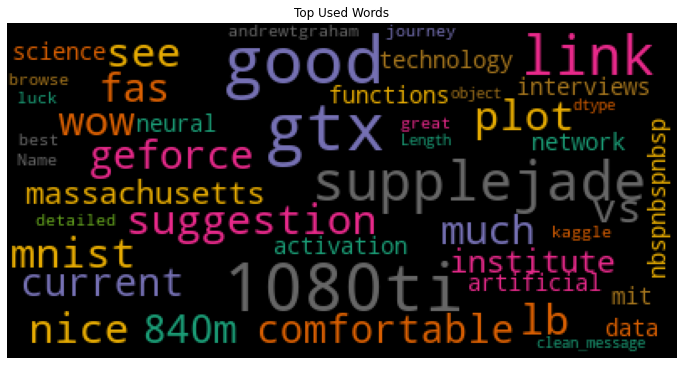

In [30]:
_generate_report("muhakabartay")